In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:
len(gpus)

0

In [5]:
cpu = tf.config.experimental.list_physical_devices('CPU')

In [6]:
cpu

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
# dodgy images

In [12]:
import cv2
import imghdr

In [10]:
data_dir = 'datasets'


In [11]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [17]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in exts")
                os.remove(image_path)
        except Exception as e:
            print('issue with image {}'.format(image_path))
        

harry
hermoine
RON


In [14]:
for image_class in os.listdir(data_dir):
    print(image_class)

harry
hermoine
RON


In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir , image_class)):
        print(image)

1480508469-harry-potter-in-90-minutes-1480436463.jpg
150401-tv-feature-harry-potter-image1-vpdnsqfrou.jpg
16870061670094.jpg
1E1h584wsncklUnSfOmfK_w.png
200px-HarryBlood.jpg
2087355-936full_harry_potter_and_the_goblet_of_fire_screenshot.jpg
220px-P_Harry_Potter-icon.svg.png
300px-Harry-Potter-PNG-Background.png
3189716-47.jpg
3fc542812dba415d446dabec3f697627b0-08-harry-potter.2x.h473.w710.jpg
4846d556747cece77e420a781752f3cf.png
4MTItMDhiOGVmZmIwOWMxXkEyXkFqcGdeQXVyNzU1NzE3NTg._V1_QL75_UX500_CR047500281_.jpg
56ffe5a04964cca4e534403a102924b3.jpg
750x513_PBH-poster_web.jpg
a-8-harry-potter-harry.jpg
a-8-harry-potter-harry_3x4.jpg
a-8-harry-potter-ron-harry_3x2.jpg
a5b93ad9c2f8b346c8ebee69e11b036d.jpg
Daniel-Radcliffe-Harry-Potter-and-the-Philosophers.jpg
daniel-radcliffe-harry-potter-movies.jpg
Daniel-Radcliffe-in-the-Epilogue-of-Harry-Potter-and-the-Deathly-Hallows.jpg
Daniel-Radcliffe-Rupert-Grint-Emma-Watson-Harry.jpg
Daniel_Radcliffe_SDCC_2014.jpg
famous-harry-potter-quote.png
fUbaMu

In [19]:
# load the datasets

In [20]:
import numpy as np
from matplotlib import pyplot as plt 

In [22]:
data = tf.keras.utils.image_dataset_from_directory('datasets')

Found 248 files belonging to 3 classes.


In [23]:
data_iterator = data.as_numpy_iterator()

In [38]:
batch = data_iterator.next()

In [26]:
len(batch)
# images and labels

2

In [30]:
batch[0].shape

(32, 256, 256, 3)

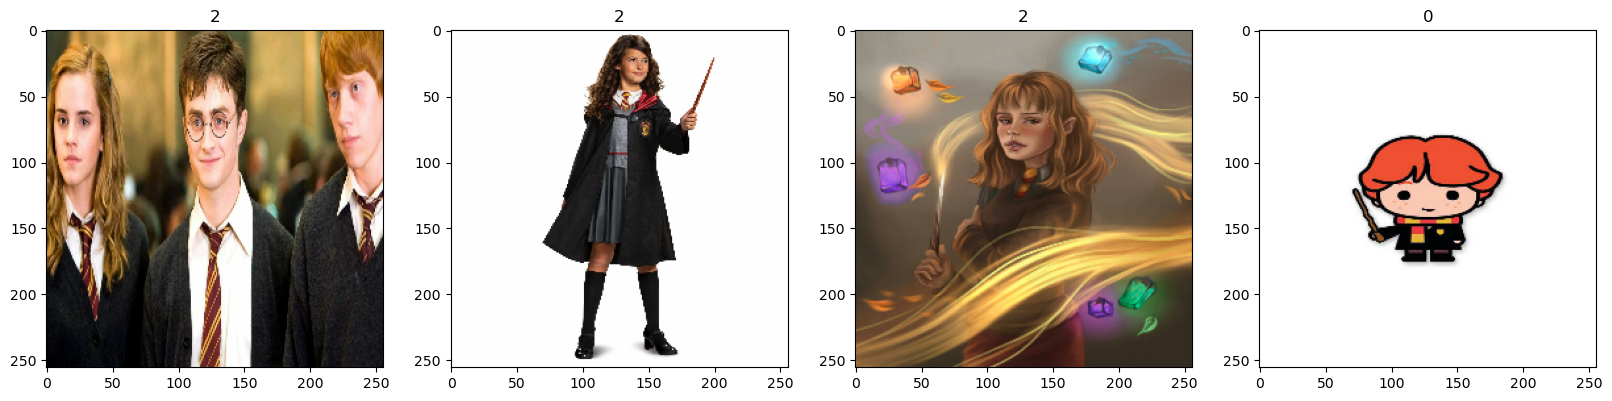

In [39]:
fig, ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [40]:
# ron : 0
# harry : 1
# hermoine : 2

In [41]:
# preprocessing the data

In [42]:
data = data.map(lambda x,y : (x/255, y))

In [46]:
data.as_numpy_iterator().next()[0].min()

0.0

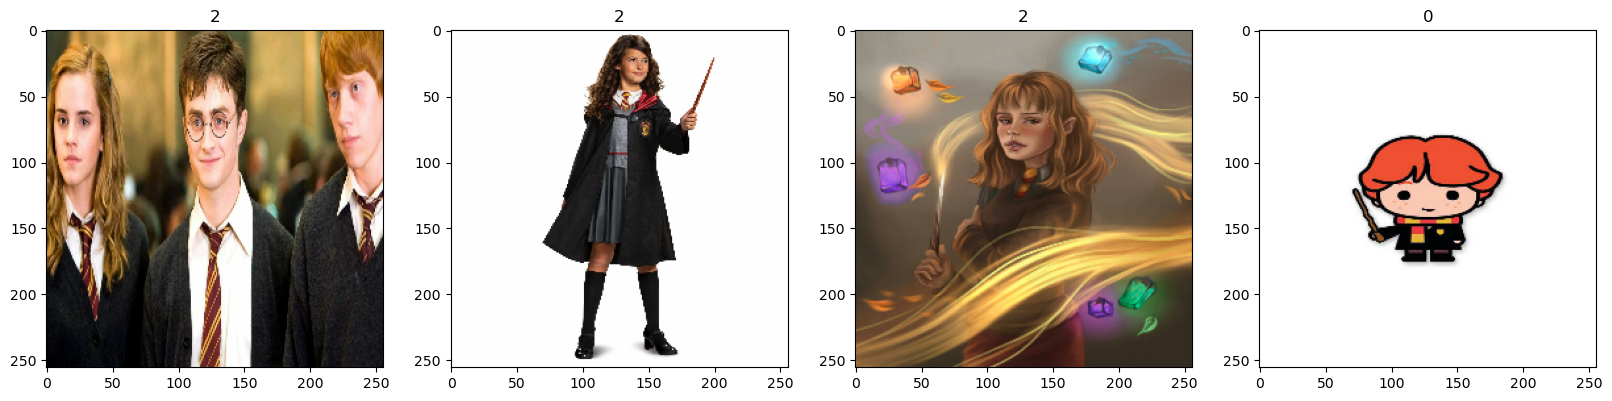

In [47]:
fig, ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [48]:
# splitting the dataset

In [75]:
len(data)

8

In [77]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)


In [78]:
train_size+test_size+val_size

6

In [79]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [90]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [80]:
# building a eep learning model

In [81]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten , Dropout

In [82]:
model = Sequential()

In [101]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Example of dropout for regularization
model.add(Dense(3, activation='softmax'))


In [103]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [105]:
logdir = 'logs'

In [106]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [107]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Shivam\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Shivam\AppData\Local\Temp\ipykernel_17880\2029832520.py", line 1, in <module>
    hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Shivam\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\Shivam\AppData\Local\Temp\__autograph_generated_filejld_3sy6.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "c:\Users\Shivam\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Sh